In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
import random
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,RMSprop,Adagrad,SGD
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error 

In [51]:
df = pd.read_csv('/content/drive/MyDrive/Dhanda/WineQuality Prediction/WineQT.csv')

In [52]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
836,6.8,0.66,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5,1183
62,7.0,0.62,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,5,89
544,9.0,0.58,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5,760
430,10.1,0.65,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6,608
671,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,951


In [53]:
print(f'The shape of the dataset is:{df.shape}')

The shape of the dataset is:(1143, 13)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [55]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [56]:
# We can see that there is  column with the ID. We can say that the id and wine quaality has no correlation with each other
# So, it wise to drop it for our training purpose

df.drop('Id', axis = 1,inplace= True)

In [57]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


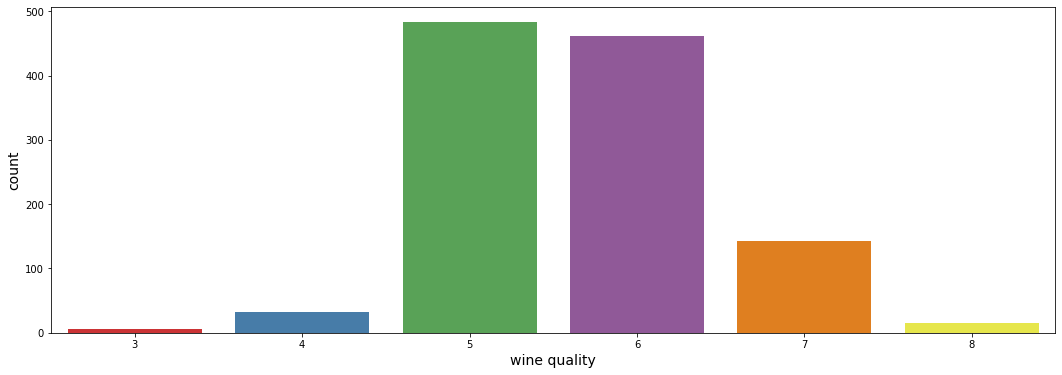

In [58]:
plt.figure(figsize=(18,6))
ax1 = sns.countplot(x='quality',data=df,palette = 'Set1')
plt.xlabel('wine quality',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.show()

In [59]:
# We can observe the quality is the only categorical value present here
# Rest all of the columns are continous values.
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [60]:
smote = SMOTE(sampling_strategy = 'auto',)
x_sm,y_sm = smote.fit_resample(X,Y)

In [61]:
print(x_sm.shape,y_sm.shape)

(2898, 11) (2898,)


In [62]:
X = x_sm
Y = y_sm

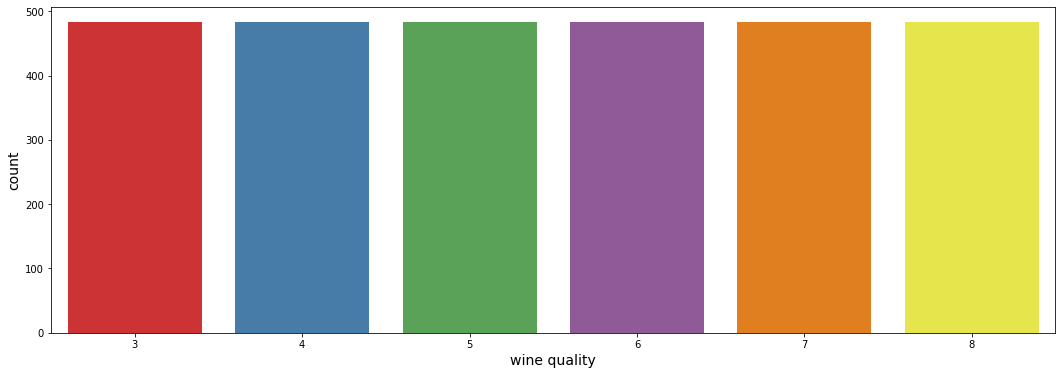

In [63]:
plt.figure(figsize=(18,6))
ax1 = sns.countplot(Y,palette = 'Set1')
plt.xlabel('wine quality',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.show()

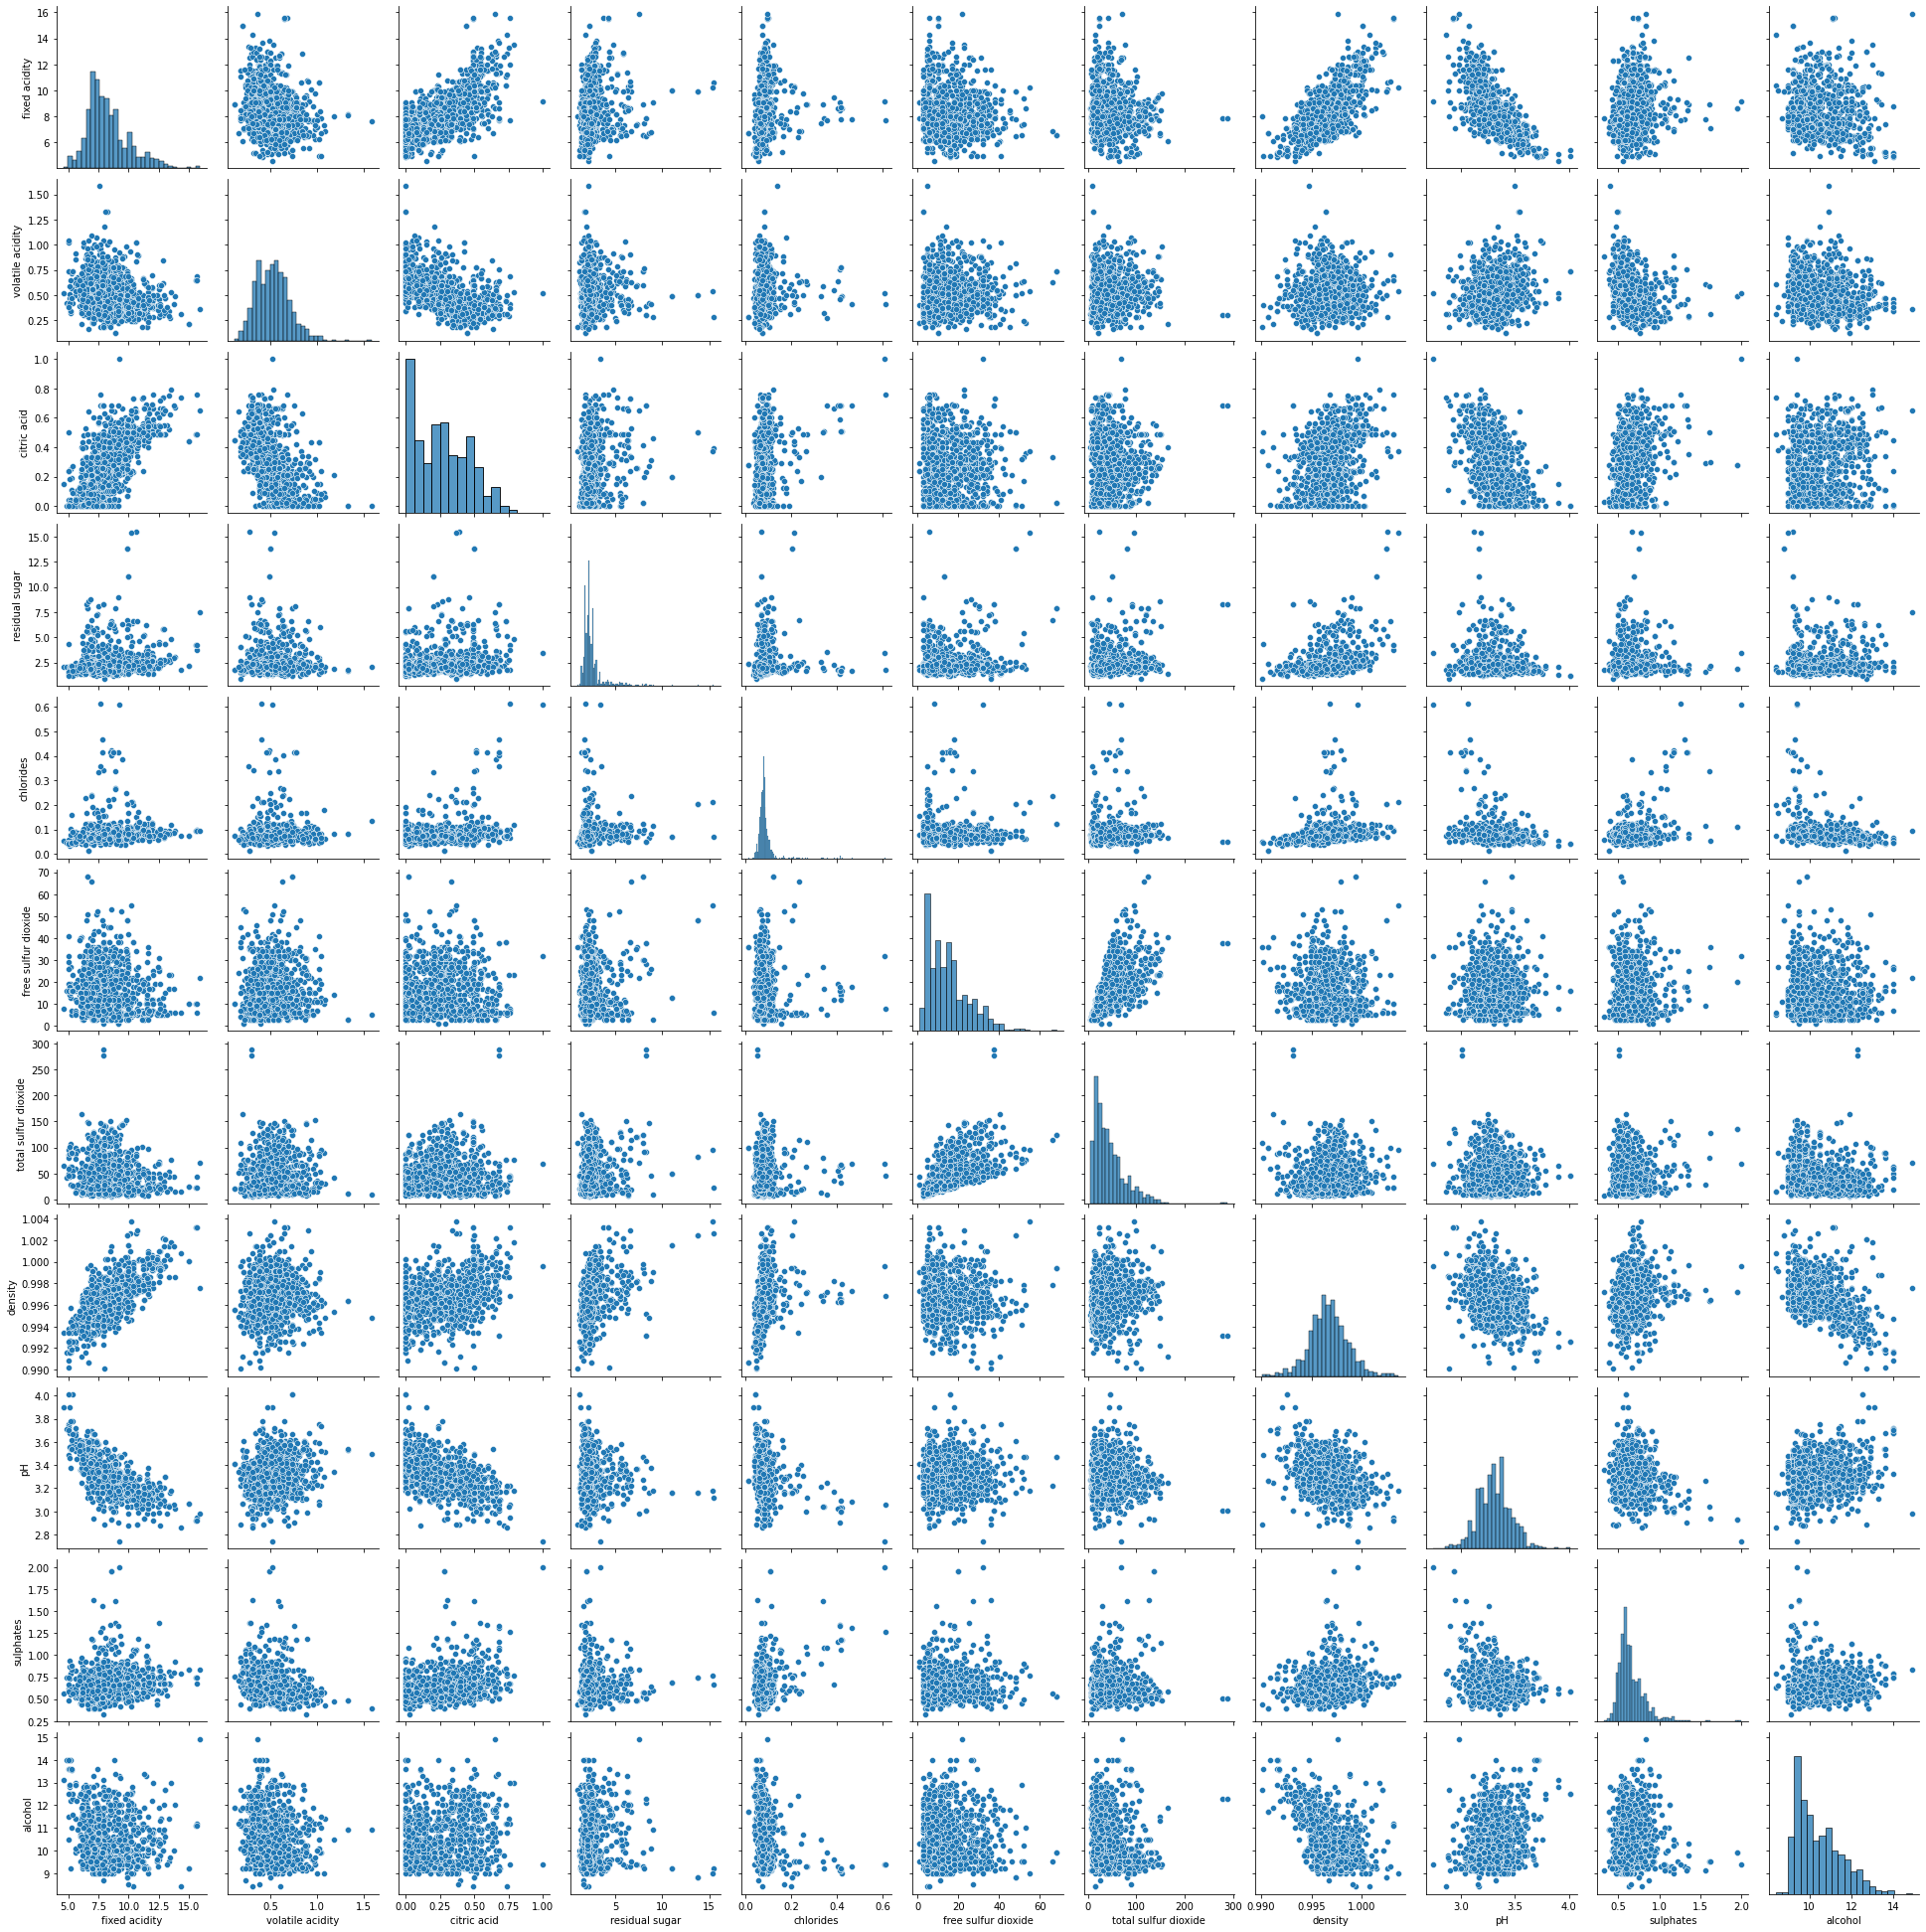

In [12]:
sns.pairplot(X)

In [64]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.288769,0.738592,0.170145,0.125525,-0.181215,-0.136903,0.651089,-0.722992,0.180136,-0.116451
volatile acidity,-0.288769,1.000000,-0.600163,0.002644,0.158879,-0.104793,-0.049101,0.070852,0.404027,-0.446394,-0.300708
citric acid,0.738592,-0.600163,1.000000,0.148420,0.210598,-0.048504,0.013011,0.334136,-0.685951,0.443783,0.158925
residual sugar,0.170145,0.002644,0.148420,1.000000,0.051660,0.050618,0.100063,0.335446,-0.096701,-0.011243,0.109088
chlorides,0.125525,0.158879,0.210598,0.051660,1.000000,0.038312,0.025717,0.285065,-0.244202,0.374882,-0.304538
free sulfur dioxide,-0.181215,-0.104793,-0.048504,0.050618,0.038312,1.000000,0.712011,-0.093741,0.059893,0.111063,-0.032891
total sulfur dioxide,-0.136903,-0.049101,0.013011,0.100063,0.025717,0.712011,1.000000,0.016560,-0.001478,0.084846,-0.117466
density,0.651089,0.070852,0.334136,0.335446,0.285065,-0.093741,0.016560,1.000000,-0.322422,0.055934,-0.589096
pH,-0.722992,0.404027,-0.685951,-0.096701,-0.244202,0.059893,-0.001478,-0.322422,1.000000,-0.331808,0.114015
sulphates,0.180136,-0.446394,0.443783,-0.011243,0.374882,0.111063,0.084846,0.055934,-0.331808,1.000000,0.198513


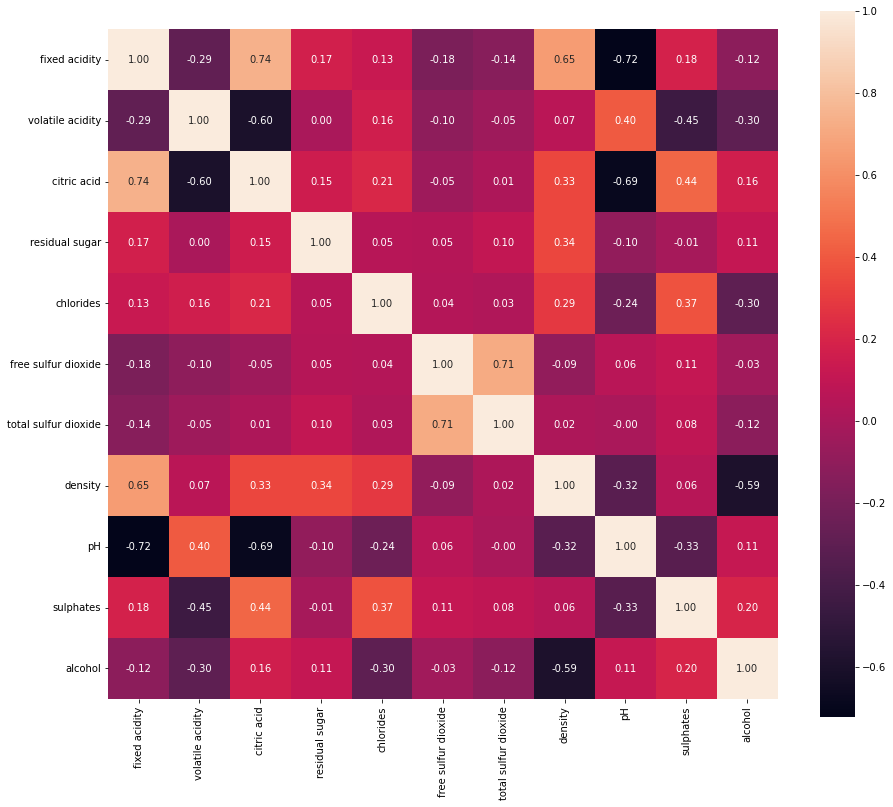

In [65]:
plt.figure(figsize=(15,13))
ax = sns.heatmap(X.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

fixed acidity


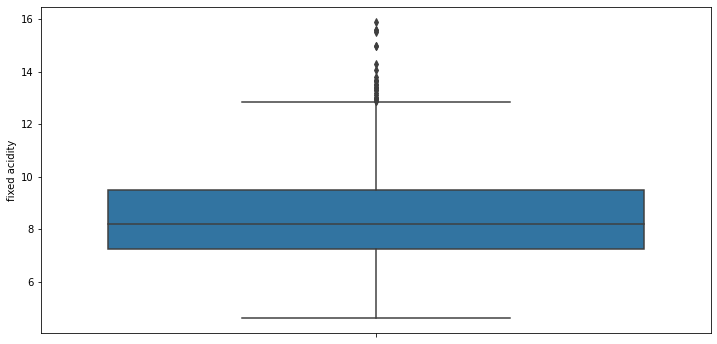

volatile acidity


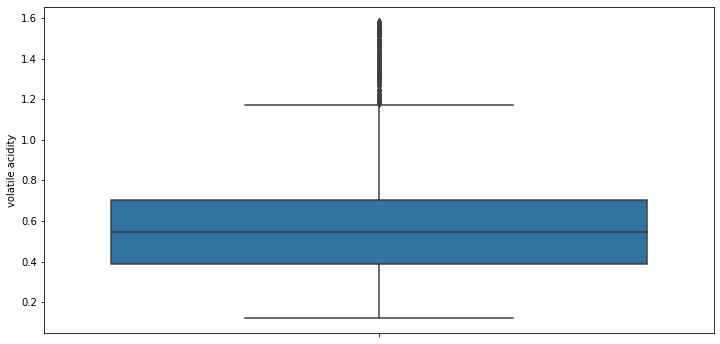

citric acid


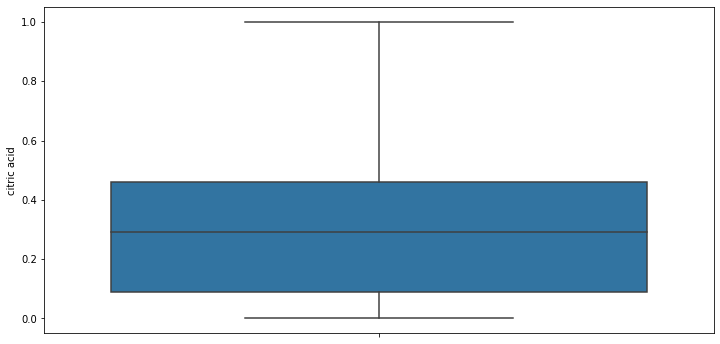

residual sugar


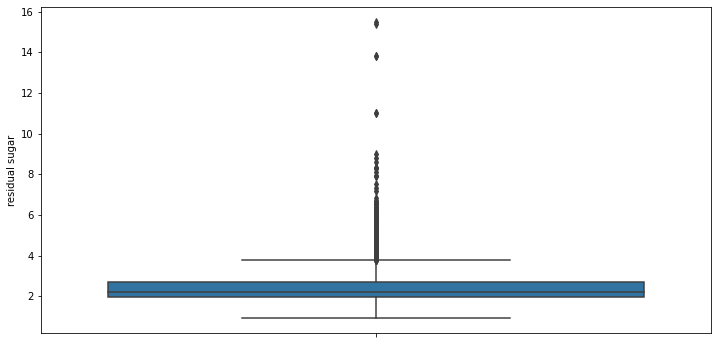

chlorides


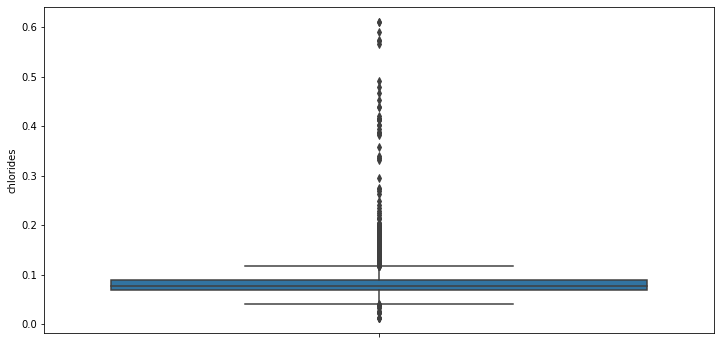

free sulfur dioxide


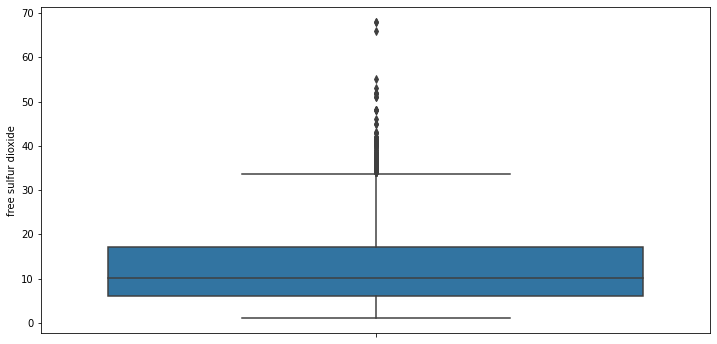

total sulfur dioxide


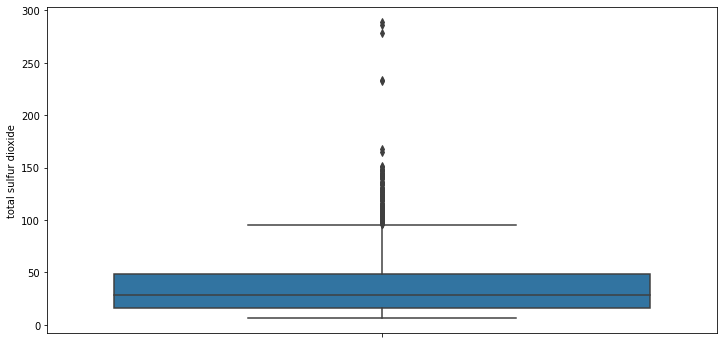

density


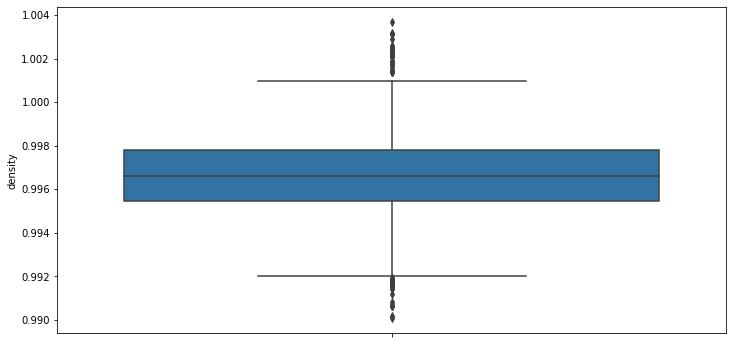

pH


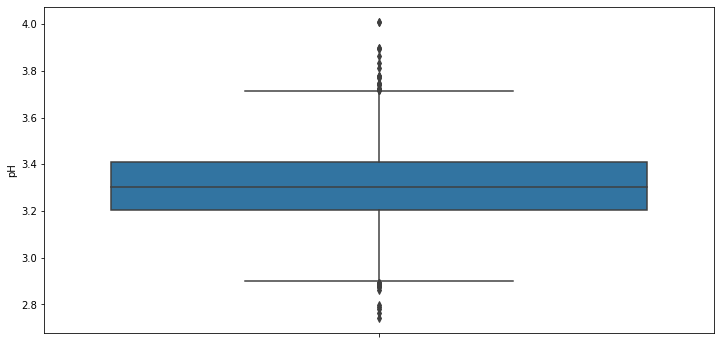

sulphates


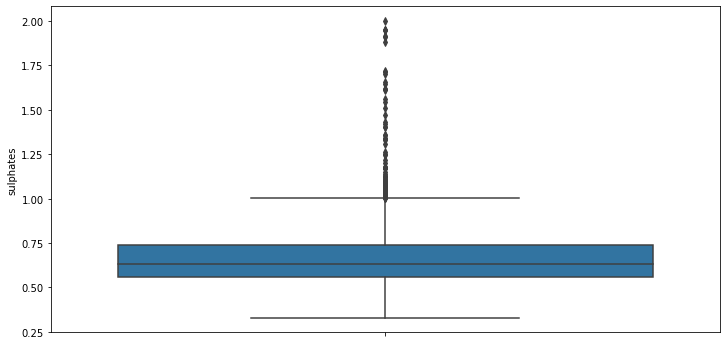

alcohol


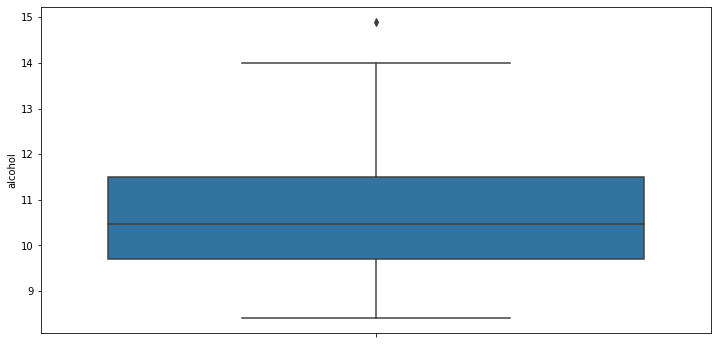

In [67]:
for col in X.columns:
  print(col)
  plt.figure(figsize = (12,6))
  sns.boxplot(data=X,y=col)
  plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
StdSc = StandardScaler()
X = StdSc.fit_transform(X)


In [69]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LE = LabelEncoder()
Y_ = LE.fit_transform(Y)
OHE = OneHotEncoder(sparse=False)
Y = OHE.fit_transform(Y_.reshape(-1,1))

In [70]:
Y

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [71]:

model = Sequential()

model.add(Dense(32,input_dim=11,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(256,activation='relu'))

model.add(Dense(units=6,activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                384       
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 6)                

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.15)

In [73]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2463, 11)
(2463, 6)
(435, 11)
(435, 6)


In [74]:
X_train

array([[-0.76465945,  1.42662636, -1.16483814, ...,  0.27509764,
        -0.76482338, -0.58380286],
       [ 1.30903426, -0.08990016,  1.61357773, ..., -0.62481182,
         0.16547859,  2.15326183],
       [-0.82947713,  0.68338751, -1.06253788, ...,  1.38635409,
        -0.22304282, -0.65057614],
       ...,
       [ 1.80572   , -1.0808897 ,  1.21845795, ..., -2.16847769,
         0.22545011, -1.22913236],
       [-0.1441909 , -1.14728819,  0.68287952, ..., -0.14185689,
        -0.02891768,  0.87169062],
       [ 3.89748735, -1.51105428,  0.73207099, ..., -1.58260056,
         1.06505145, -1.22913236]])

In [75]:
lr_list = [1e-3,1e-2]
# For a binary classification problem
for lr in lr_list:

  opt1 = Adam(learning_rate=lr)
  opt2 = RMSprop(learning_rate=lr)
  opt3 = Adagrad(learning_rate=lr)
  opt4 = SGD(learning_rate=lr)
  optimizer_list = [opt1,opt2,opt3,opt4]

  # model.compile(loss='binary_crossentropy', optimizer=opt)
  for i in range(len(optimizer_list)):
    opt_name = ''
    if i == 0:
      opt_name = 'Adam'
    elif i==1:
      opt_name = 'RMSProp'
    elif i==2:
      opt_name = 'Adagrad'
    else:
      opt_name = 'SGD'

    print(f'For learning rate:{lr} and optimizer:{opt_name}\n')

    model.compile(loss='categorical_crossentropy', optimizer=optimizer_list[i], metrics=['accuracy'])
    history = model.fit(X_train,Y_train,epochs=200,verbose=0)
    Y_pred = model.predict(X_test)

    # Y_invtrans = OHE.inverse_transform(Y_test)
    # Y_invtrans = Y_invtrans.flatten()
    Y_test_inv = np.argmax(Y_test,axis =1)
    Y_pred_inv = np.argmax(Y_pred,axis =1)
    print(classification_report(Y_test_inv,Y_pred_inv))
    print('#'*100)
    print()

For learning rate:0.001 and optimizer:Adam

14/14 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       0.95      0.99      0.97        79
           2       0.83      0.75      0.79        87
           3       0.69      0.62      0.66        64
           4       0.82      0.92      0.87        64
           5       0.97      1.00      0.99        72

    accuracy                           0.88       435
   macro avg       0.87      0.88      0.88       435
weighted avg       0.88      0.88      0.88       435

####################################################################################################

For learning rate:0.001 and optimizer:RMSProp

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       0.92      1.00      0.96      